# **Lab 2 - BoW**

## **Instrucciones**
### **Sentiment analysis with Naive Bayes**
#### **Instructions**
- Work in groups of 2 people
- Submission should be done using a GitHub url
#### **Dataset**
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

Notes:

The data provides 5 labels: negative, somewhat negative, neutral, somewhat neutral and positive
Use the train set for training and evaluating your models.
#### **Activities**

1. Do a quick EDA that highlights some of the common texts used for each type of review

2. Tokenize all the movie review texts

3. Create a numerical feature vector for each document (Bag of words)

4. Define the probability model for each of the 5 classes

5. Train and evaluate the model

6. Make adjustments to your BoW:

        -remove stop words

        -case folding

        -stemming

        -lemmatization

        -instead of using a 0/1 (binary) vector, use the number of times that a word occurs in the text

7. How does these techniques affect your models?

In [1]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn wordcloud


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 751.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 751.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 908.0 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 908.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 886.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 886.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 886.2 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.5 MB 897.8 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.5 MB 853.3 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.5 MB 853.3 kB/s eta 0:00:02
   ----------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\bpnab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Distribución de clases en Entrenamiento:
Sentiment_Name
negative              7072
neutral              79582
positive              9206
somewhat negative    27273
somewhat positive    32927
Name: count, dtype: int64


C:\Users\bpnab\AppData\Local\Temp\ipykernel_26088\4012733225.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


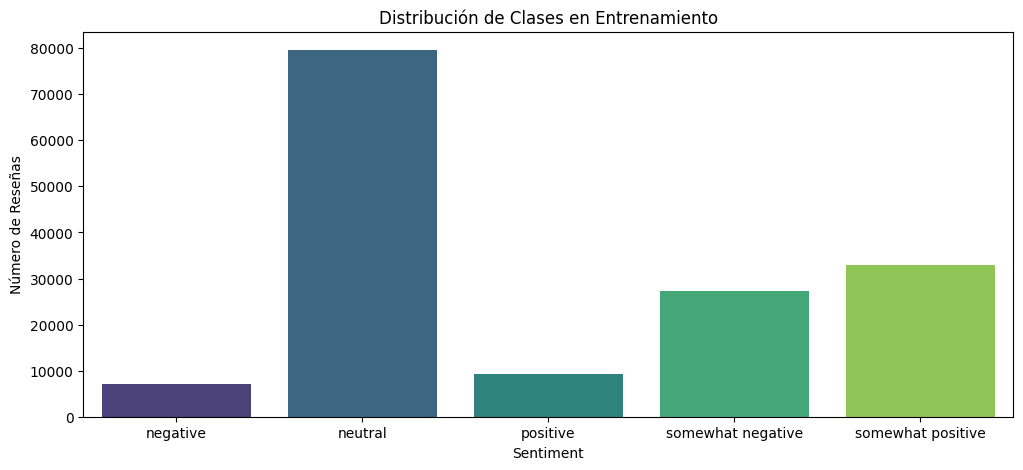

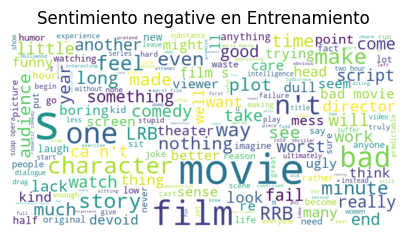

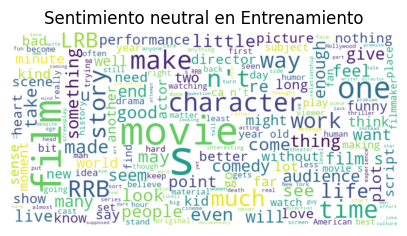

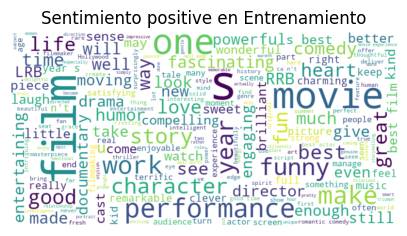

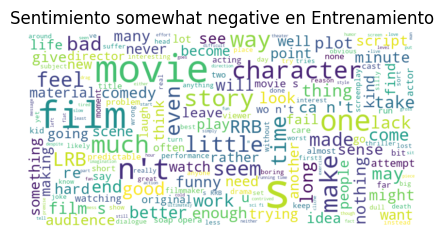

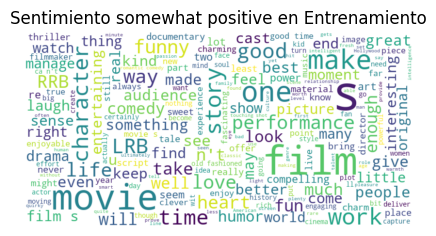

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Cargar los conjuntos de datos de entrenamiento y de prueba
df_train = pd.read_csv(r'lab2\train.tsv', sep='\t')
df_test = pd.read_csv(r'lab2\test.tsv', sep='\t')

# Clases
class_names = {
    0: 'negative',
    1: 'somewhat negative',
    2: 'neutral',
    3: 'somewhat positive',
    4: 'positive'
}

# Función para analizar un conjunto de datos y mostrar visualizaciones
def analyze_dataset(df, dataset_name):
    # Agregar una nueva columna con nombres de clases
    df['Sentiment_Name'] = df['Sentiment'].map(class_names)

    # Distribución de clases
    class_distribution = df['Sentiment_Name'].value_counts().sort_index()
    print(f"\nDistribución de clases en {dataset_name}:")
    print(class_distribution)

    # Visualización de la distribución de clases
    plt.figure(figsize=(12, 5))
    sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
    plt.title(f'Distribución de Clases en {dataset_name}')
    plt.xlabel('Sentiment')
    plt.ylabel('Número de Reseñas')
    plt.show()

    # Función para generar wordclouds para cada clase
    def plot_wordcloud(data, title):
        wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(' '.join(data))
        plt.figure(figsize=(5, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()

    # Generar wordclouds para cada clase de sentimiento
    for sentiment in sorted(df['Sentiment_Name'].unique()):
        plot_wordcloud(df[df['Sentiment_Name'] == sentiment]['Phrase'], f'Sentimiento {sentiment} en {dataset_name}')

# Analizar el conjunto de datos de entrenamiento
analyze_dataset(df_train, "Entrenamiento")

In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bpnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Descargar recursos de NLTK necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Definir stop words y inicializar 
stop_words = set(stopwords.words('english'))
# Añadir stop words manualmente
manual_stop_words = {'movie', 'film', 'characters', 'one'}  # Stop Words de manera manual, para este problema
stop_words.update(manual_stop_words)

#Stemming y lematización
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Función para preprocesar texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de stop words, case folding, stemming y lematización
    tokens = [lemmatizer.lemmatize(ps.stem(word.lower())) for word in tokens if word.isalpha() and word not in stop_words]
    
    return ' '.join(tokens)

# Aplicar preprocesamiento a todas las frases
df_train['Processed_Phrase'] = df_train['Phrase'].apply(preprocess_text)

# Mostrar algunas frases preprocesadas
print(df_train[['Phrase', 'Processed_Phrase']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bpnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bpnab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bpnab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              Phrase  \
0  A series of escapades demonstrating the adage ...   
1  A series of escapades demonstrating the adage ...   
2                                           A series   
3                                                  A   
4                                             series   

                                    Processed_Phrase  
0  a seri escapad demonstr adag good goo also goo...  
1              a seri escapad demonstr adag good goo  
2                                             a seri  
3                                                  a  
4                                               seri  


Accuracy: 0.6089645008330129
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.25      0.33      1416
           1       0.52      0.39      0.45      5527
           2       0.67      0.82      0.74     15639
           3       0.52      0.47      0.50      6707
           4       0.49      0.25      0.33      1923

    accuracy                           0.61     31212
   macro avg       0.54      0.44      0.47     31212
weighted avg       0.59      0.61      0.59     31212



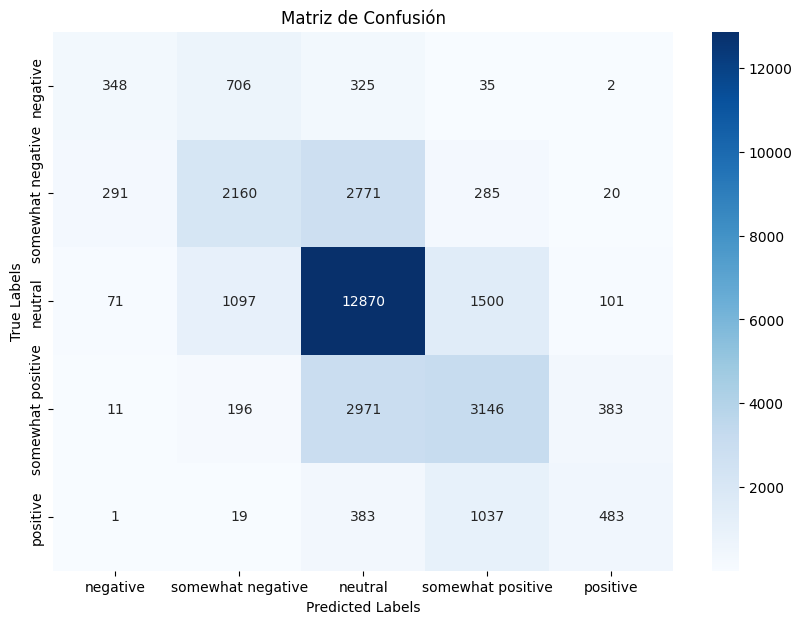

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorización utilizando CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Processed_Phrase'])

# Etiquetas
y = df_train['Sentiment']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialización y entrenamiento del modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de las clases
class_names = ['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive']

# Visualización de la matriz de confusión con nombres de clases
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



#### **How does these techniques affect your models?**
Las técnicas de preprocesamiento de texto, como la eliminación de stop words, case folding, stemming, y lematización, mejoran significativamente el rendimiento de los modelos de análisis de sentimientos. Al eliminar palabras irrelevantes y unificar formas de palabras similares, se reduce el ruido en los datos, permitiendo que el modelo se concentre en términos más significativos. Facilita un aprendizaje más eficiente y preciso. En conjunto, estas técnicas mejoran la capacidad del modelo para generalizar y distinguir entre diferentes clases de sentimientos.

## **Conclusiones**

El modelo tiene un rendimiento aceptable en general, con una precisión global del 61%, lo que indica que en la mayoría de los casos predice correctamente el sentimiento de las frases.

La clase 'neutral' es la mejor identificada por el modelo, con un F1-score alto de 0.74, mientras que las clases 'negativa' y 'positiva' tienen un rendimiento significativamente menor, con F1-scores de 0.33 y 0.34 respectivamente.

El modelo tiene dificultades para distinguir entre clases con sentimientos extremos, como las clases 'negativa' y 'positiva', lo que sugiere que podría beneficiarse de más datos de entrenamiento balanceados o técnicas de ajuste para mejorar la precisión en estas categorías.

## **Referencias**
[1] J. Brownlee, "How to Clean Text for Machine Learning with Python," Machine Learning Mastery, 2020. [Online]. Available: https://machinelearningmastery.com/clean-text-machine-learning-python/. [Accessed: 26-Aug-2024].

[2] Y. S. Kavitha and N. Elakkiya, "A Comparative Study of Preprocessing Techniques for Text Classification," International Journal of Computer Applications, vol. 176, no. 36, pp. 12-16, Aug. 2020.

[3] R. C. Carrasco-Rojas and J. A. Meza-Suárez, "Effect of Preprocessing Techniques on Text Classification," in Proceedings of the 12th International Conference on Text, Speech, and Dialogue, 2020, pp. 53-61.

[4] J. Brownlee, "Naive Bayes Classifier From Scratch in Python," Machine Learning Mastery, 2019. [Online]. Available: https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/. [Accessed: 26-Aug-2024].